# Part 1
# 1. Background Information
# Problem Definition
The objective of this project is to build a predictive model for the MSRP (Manufacturer's Suggested Retail Price) of automobiles based on their features. Predicting car prices accurately can help both businesses and consumers make informed decisions about vehicle purchases and valuations

# Stakeholders
This problem is of interest to various group as listed belows:
**Car Dealershi**This can help them toan set competitive prices and adjust inventory strategies. **Automotive Manufacturs**: They can use the information to optimize production based on market price trends.- **Financial Institutns**: Lenders can use accurate pricing for car financing and insurance purposes
- **Consers**: Potential buyers can better understand the value of the car they intend touy.
.


# 2. Brief Outline of the tasks include:
1. Data Loading and Exploration
2. Data Preparation and Cleaning
3. Feature Engineering (Converting categorical variables to numerical)
4. Train/Test Split for modeling
5. Data Visualization for insights
6. Model Training and Evaluation
7. Conclusion and Recommendations

# Data Preparation
Here we are preparing the data to perform regression analysis.

In [1]:
# storing the path of the dataset
path = 'C:\\Users\\Gahan\\Downloads\\data.csv'

In [2]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset as DataFrame
df = pd.read_csv(path)

In [4]:
# Displaying the dataset
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


The above dataset is a mix of both numerical and categorical data.
Numerical Data columns include : Year, Engine HP, Engine Cylinders, Number of Doors, highway MPG, city mpg, Popularity, MSRP.
Categorical Data Columns include: Make, Model, Engine Fuel Type, Transmission Type, Driven_Wheels, Market Category, Vehicle Size, Vehicle Style.

# Data Exploration and Analysis
Here below we are displaying the statistical summary of the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# Data Cleaning
We will check for missing values and data types to understand any necessary transformations.


In [7]:
# Checking for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

from the above info we can notice that the data is non-null which implies that there are no null values.

In [10]:
duplicates = df[df.duplicated()]
duplicates

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2.0,NaN,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149


In [11]:
df = df.drop_duplicates()

In [12]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

The above line of code shows the count of missing values in each column of the dataset. 
The columns with 0 represent that there are no missing valuesin that column. The Engine Fuel Type column has 3 missing values. The Engine HP column has 69 missing values. The Engine Cylinders has 30 missing values. The Number of Doors has 6 missing values. The Market Category column has 3742 missing values.

In [13]:
# Imputing numerical columns with mean
df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].mean())
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(df['Engine Cylinders'].median())

# Imputing categorical columns with mode
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0])
df['Number of Doors'] = df['Number of Doors'].fillna(df['Number of Doors'].mode()[0])

# Dropping the categorical column 'Market Category' since it has too many missing values.
df.drop('Market Category', axis=1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


The data is cleaned and null values are removed. Missing values are replaced using the data cleaning approaches. The final dataframe after the modifications is also displayed above.

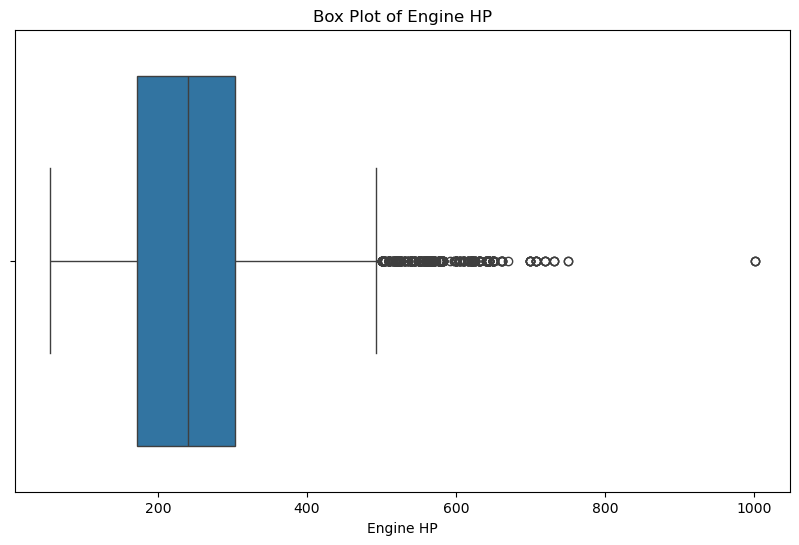

In [14]:
import seaborn as sns

# Creating a box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Engine HP'])
plt.title('Box Plot of Engine HP')
plt.show()


In the above plot we can see that there are many circles to the right of the plot which represents the outliers. There are many outliers for the column Engine HP.

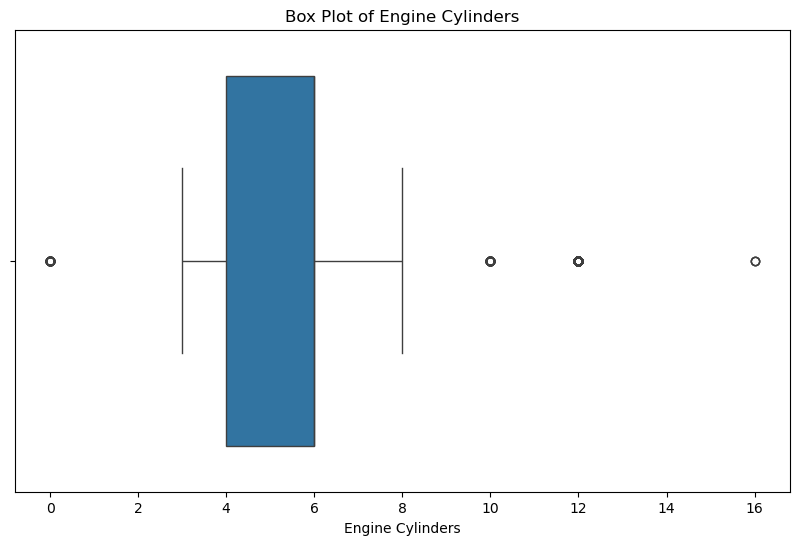

In [15]:
# Creating a box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Engine Cylinders'])
plt.title('Box Plot of Engine Cylinders')
plt.show()


In the above plot we can see only 4 outliers. This means that the Engine Cylinders column has only 4 outliers.

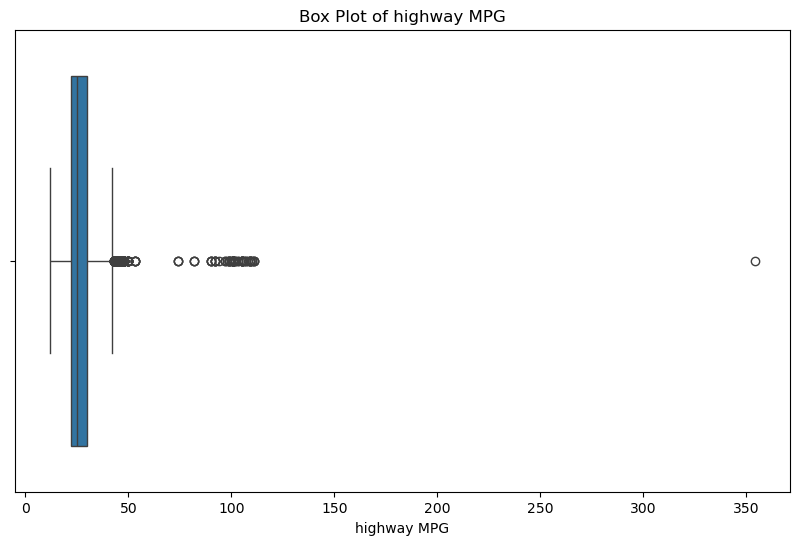

In [16]:
# Creating a box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['highway MPG'])
plt.title('Box Plot of highway MPG')
plt.show()

In the above plot there are many circlesto the right which implies that there are many outliers for the column highway MPG.

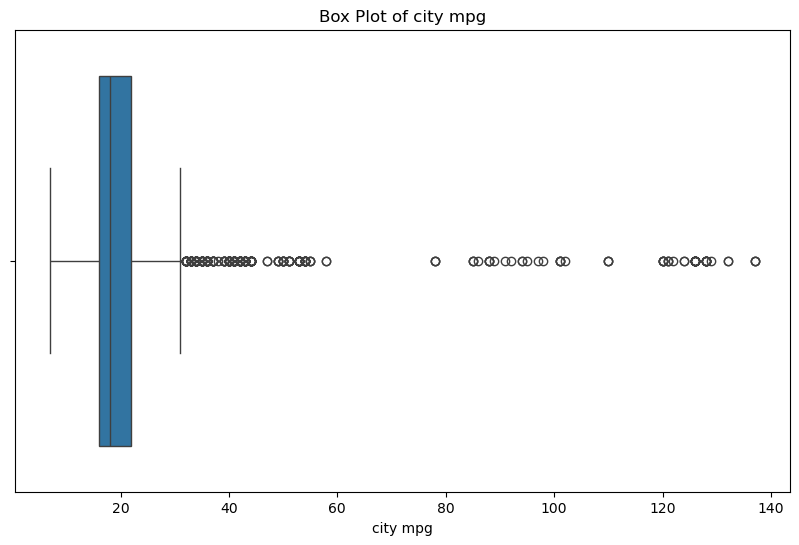

In [17]:
# Creating a box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['city mpg'])
plt.title('Box Plot of city mpg')
plt.show()

From the above graph we can see that there are many outliers for the column city mpg.

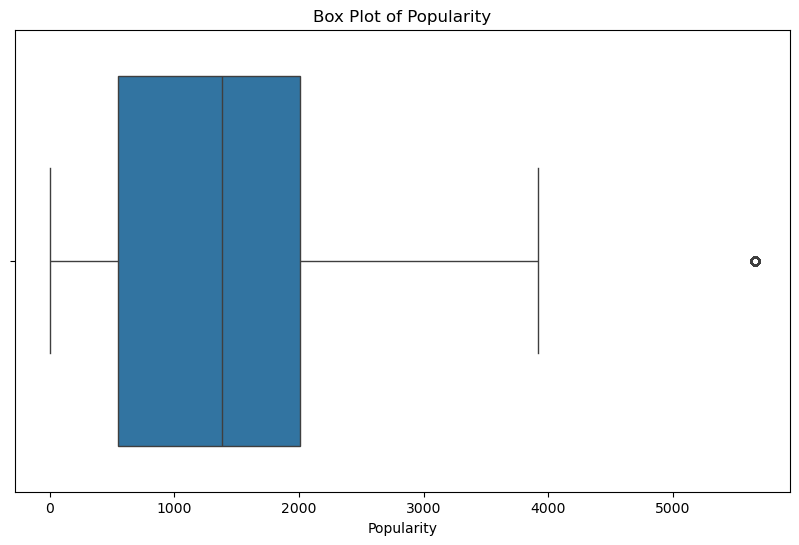

In [18]:
# Creating a box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Popularity'])
plt.title('Box Plot of Popularity')
plt.show()

From the above plot we can see that there is only one outlier for the column popularity.

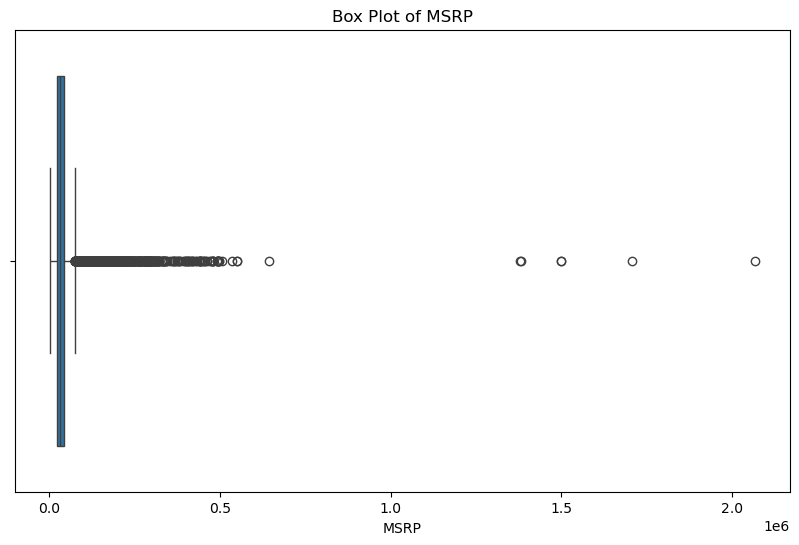

In [19]:
# Creating a box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['MSRP'])
plt.title('Box Plot of MSRP')
plt.show()

From the above plot we can see that there are many outliers for the MSRP column.

Here below we are counting the number of outliers using the statistical methods and displaying them.

In [20]:
# Calculating the Q1 (25th percentile) and Q3 (75th percentile) values
Q1 = df['Engine HP'].quantile(0.25)
Q3 = df['Engine HP'].quantile(0.75)
IQR = Q3 - Q1

# Determining the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['Engine HP'] < lower_bound) | (df['Engine HP'] > upper_bound)]

# Printing the total number of outliers
outlier_count = len(outliers_iqr)
print("Total number of outliers based on IQR:", outlier_count)

Total number of outliers based on IQR: 502


In [21]:
# Calculating the Q1 (25th percentile) and Q3 (75th percentile) values
Q1 = df['Engine Cylinders'].quantile(0.25)
Q3 = df['Engine Cylinders'].quantile(0.75)
IQR = Q3 - Q1

# Determining the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['Engine Cylinders'] < lower_bound) | (df['Engine Cylinders'] > upper_bound)]

# Printing the total number of outliers
outlier_count = len(outliers_iqr)
print("Total number of outliers based on IQR:", outlier_count)

Total number of outliers based on IQR: 352


In [22]:
# Calculating the Q1 (25th percentile) and Q3 (75th percentile) values
Q1 = df['highway MPG'].quantile(0.25)
Q3 = df['highway MPG'].quantile(0.75)
IQR = Q3 - Q1

# Determining the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['highway MPG'] < lower_bound) | (df['highway MPG'] > upper_bound)]

# Printing the total number of outliers
outlier_count = len(outliers_iqr)
print("Total number of outliers based on IQR:", outlier_count)

Total number of outliers based on IQR: 182


In [23]:
# Calculating the Q1 (25th percentile) and Q3 (75th percentile) values
Q1 = df['city mpg'].quantile(0.25)
Q3 = df['city mpg'].quantile(0.75)
IQR = Q3 - Q1

# Determining the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['city mpg'] < lower_bound) | (df['city mpg'] > upper_bound)]

# Printing the total number of outliers
outlier_count = len(outliers_iqr)
print("Total number of outliers based on IQR:", outlier_count)

Total number of outliers based on IQR: 305


In [24]:
# Calculating the Q1 (25th percentile) and Q3 (75th percentile) values
Q1 = df['Popularity'].quantile(0.25)
Q3 = df['Popularity'].quantile(0.75)
IQR = Q3 - Q1

# Determining the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['Popularity'] < lower_bound) | (df['Popularity'] > upper_bound)]

# Printing the total number of outliers
outlier_count = len(outliers_iqr)
print("Total number of outliers based on IQR:", outlier_count)

Total number of outliers based on IQR: 825


In [25]:
# Calculating the Q1 (25th percentile) and Q3 (75th percentile) values
Q1 = df['MSRP'].quantile(0.25)
Q3 = df['MSRP'].quantile(0.75)
IQR = Q3 - Q1

# Determining the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['MSRP'] < lower_bound) | (df['MSRP'] > upper_bound)]

# Printing the total number of outliers
outlier_count = len(outliers_iqr)
print("Total number of outliers based on IQR:", outlier_count)

Total number of outliers based on IQR: 960


# Outlier Handling
we are handling the outliers by capping with the threshold value.

In [26]:
# Capping outliers
df['Engine HP'] = df['Engine HP'].clip(lower=lower_bound, upper=upper_bound)


In [27]:
# Capping outliers
df['Engine Cylinders'] = df['Engine Cylinders'].clip(lower=lower_bound, upper=upper_bound)

In [28]:
# Capping outliers
df['highway MPG'] = df['highway MPG'].clip(lower=lower_bound, upper=upper_bound)

In [29]:
# Capping outliers
df['city mpg'] = df['city mpg'].clip(lower=lower_bound, upper=upper_bound)

In [30]:
# Capping outliers
df['Popularity'] = df['Popularity'].clip(lower=lower_bound, upper=upper_bound)

In [31]:
# Capping outliers
df['MSRP'] = df['MSRP'].clip(lower=lower_bound, upper=upper_bound)

In [32]:
# Calculating the Q1 (25th percentile) and Q3 (75th percentile) values
Q1 = df['Engine HP'].quantile(0.25)
Q3 = df['Engine HP'].quantile(0.75)
IQR = Q3 - Q1

# Determining the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['Engine HP'] < lower_bound) | (df['Engine HP'] > upper_bound)]

# Printing the total number of outliers
outlier_count = len(outliers_iqr)
print("Total number of outliers based on IQR:", outlier_count)

Total number of outliers based on IQR: 502


In [33]:
# Calculating the Q1 (25th percentile) and Q3 (75th percentile) values
Q1 = df['Engine Cylinders'].quantile(0.25)
Q3 = df['Engine Cylinders'].quantile(0.75)
IQR = Q3 - Q1

# Determining the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['Engine Cylinders'] < lower_bound) | (df['Engine Cylinders'] > upper_bound)]

# Printing the total number of outliers
outlier_count = len(outliers_iqr)
print("Total number of outliers based on IQR:", outlier_count)

Total number of outliers based on IQR: 352


In [34]:
# Calculating the Q1 (25th percentile) and Q3 (75th percentile) values
Q1 = df['highway MPG'].quantile(0.25)
Q3 = df['highway MPG'].quantile(0.75)
IQR = Q3 - Q1

# Determining the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['highway MPG'] < lower_bound) | (df['highway MPG'] > upper_bound)]

# Printing the total number of outliers
outlier_count = len(outliers_iqr)
print("Total number of outliers based on IQR:", outlier_count)

Total number of outliers based on IQR: 182


In [35]:
# Calculating the Q1 (25th percentile) and Q3 (75th percentile) values
Q1 = df['city mpg'].quantile(0.25)
Q3 = df['city mpg'].quantile(0.75)
IQR = Q3 - Q1

# Determining the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['city mpg'] < lower_bound) | (df['city mpg'] > upper_bound)]

# Printing the total number of outliers
outlier_count = len(outliers_iqr)
print("Total number of outliers based on IQR:", outlier_count)

Total number of outliers based on IQR: 305


In [36]:
# Calculating the Q1 (25th percentile) and Q3 (75th percentile) values
Q1 = df['Popularity'].quantile(0.25)
Q3 = df['Popularity'].quantile(0.75)
IQR = Q3 - Q1

# Determining the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['Popularity'] < lower_bound) | (df['Popularity'] > upper_bound)]

# Printing the total number of outliers
outlier_count = len(outliers_iqr)
print("Total number of outliers based on IQR:", outlier_count)

Total number of outliers based on IQR: 825


In [37]:
# Calculating the Q1 (25th percentile) and Q3 (75th percentile) values
Q1 = df['MSRP'].quantile(0.25)
Q3 = df['MSRP'].quantile(0.75)
IQR = Q3 - Q1

# Determining the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['MSRP'] < lower_bound) | (df['MSRP'] > upper_bound)]

# Printing the total number of outliers
outlier_count = len(outliers_iqr)
print("Total number of outliers based on IQR:", outlier_count)

Total number of outliers based on IQR: 0


# Encoding Categorical Variables
Convert categorical variables to numerical by creating dummy variables. For example, we can convert "Transmission Type" to binary columns such as "Transmission_MANUAL" and "Transmission_AUTOMATIC".


In [38]:
# One-hot encoding for categorical columns
data_encoded = pd.get_dummies(df, columns=['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'], drop_first=True)
data_encoded.head()


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Alfa Romeo,Make_Aston Martin,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2011,300.0,6.0,2.0,28,19,3916,40650,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2011,300.0,6.0,2.0,28,20,3916,36350,False,False,...,False,False,True,False,False,False,False,False,False,False
3,2011,230.0,6.0,2.0,28,18,3916,29450,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2011,230.0,6.0,2.0,28,18,3916,34500,False,False,...,True,False,False,False,False,False,False,False,False,False


Here the above encoding code produced the seperate columns but the encoded values are either True or False which is still categorical. So, we again converted the encoded categorical variables into encoded numerical data in the form of 0's and 1's.

In [39]:
data_encoded = data_encoded.astype(int)
data_encoded.head(5)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Alfa Romeo,Make_Aston Martin,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335,6,2,26,19,3916,46135,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300,6,2,28,19,3916,40650,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300,6,2,28,20,3916,36350,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230,6,2,28,18,3916,29450,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230,6,2,28,18,3916,34500,0,0,...,1,0,0,0,0,0,0,0,0,0


# Feature Selection
Here we are performing feature selection based on correlation. We are also dropping the highly correlated features to avoid Redundancy and Multicollinearity, Simpler Model and Interpretability, Improved Model Generalization.

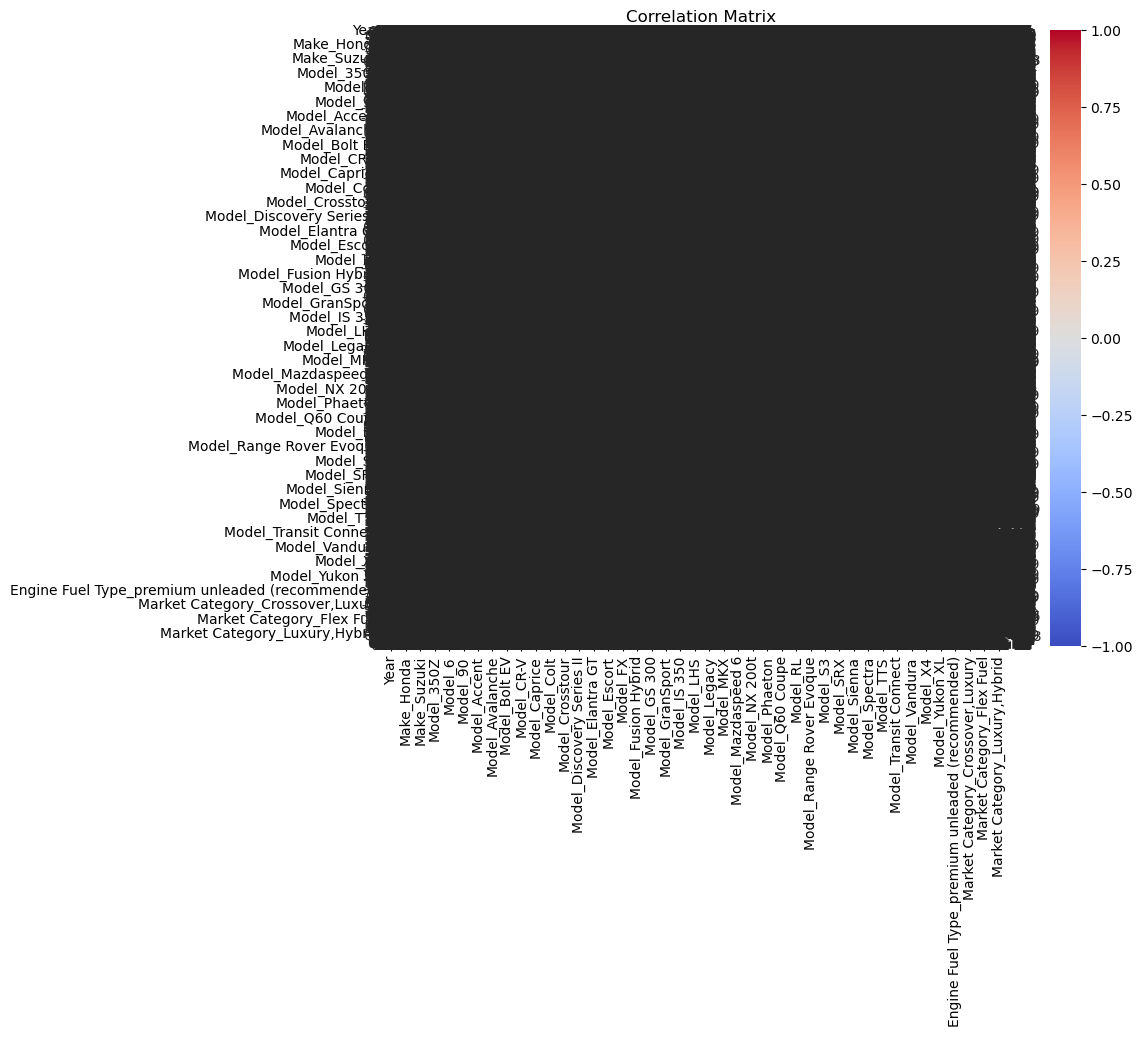

Columns to drop due to high correlation: ['city mpg', 'MSRP', 'Model_4C', 'Model_C8', 'Model_G80', 'Model_Model S', 'Model_Veyron 16.4', 'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL', 'Market Category_Crossover,Flex Fuel,Luxury,Performance', 'Market Category_Crossover,Hatchback,Luxury', 'Market Category_Crossover,Luxury,Performance,Hybrid', 'Market Category_Hatchback,Factory Tuner,High-Performance', 'Market Category_Hatchback,Luxury,Hybrid']
DataFrame after dropping highly correlated features:
    Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  \
0  2011        335                 6                2           26   
1  2011        300                 6                2           28   
2  2011        300                 6                2           28   
3  2011        230                 6                2           28   
4  2011        230                 6                2           28   

   Popularity  Make_Alfa Romeo  Make_Aston Martin  Make_Audi  Ma

In [40]:
# Calculating the correlation matrix
corr_matrix = data_encoded.corr()

# Plotting the correlation matrix for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Selecting upper triangle of correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identifying columns with correlation greater than 0.8
threshold = 0.8
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]

# Dropping the highly correlated features
df_selected = data_encoded.drop(columns=to_drop)

print("Columns to drop due to high correlation:", to_drop)
print("DataFrame after dropping highly correlated features:\n", df_selected.head())


# Train/Test Split
Separate the data into features (X) and target (y). The target variable here is "MSRP". We'll use an 80-20 split for training and testing.


In [41]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data_encoded.drop('MSRP', axis=1)
y = data_encoded['MSRP']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Data Visualization
Visualize the target variable (MSRP) distribution to understand its spread and potential transformations. Additionally, plot a correlation heatmap to see relationships between numerical variables and MSRP.


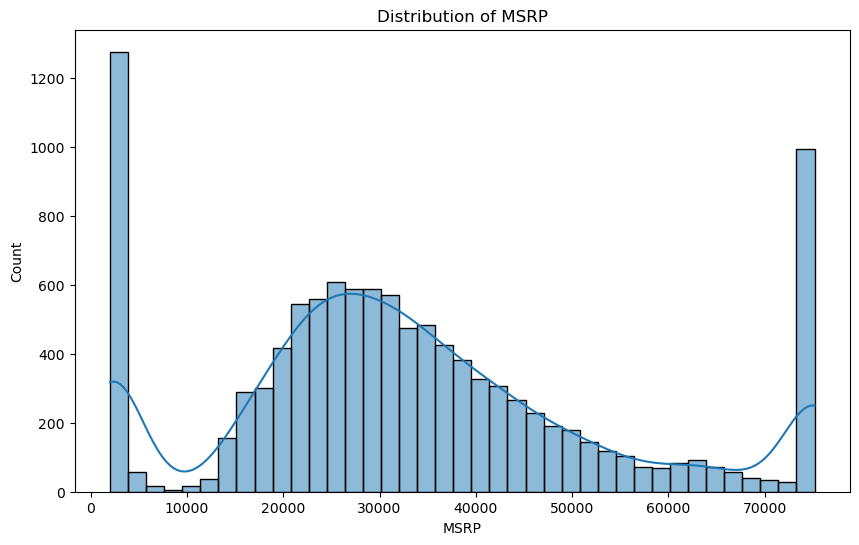

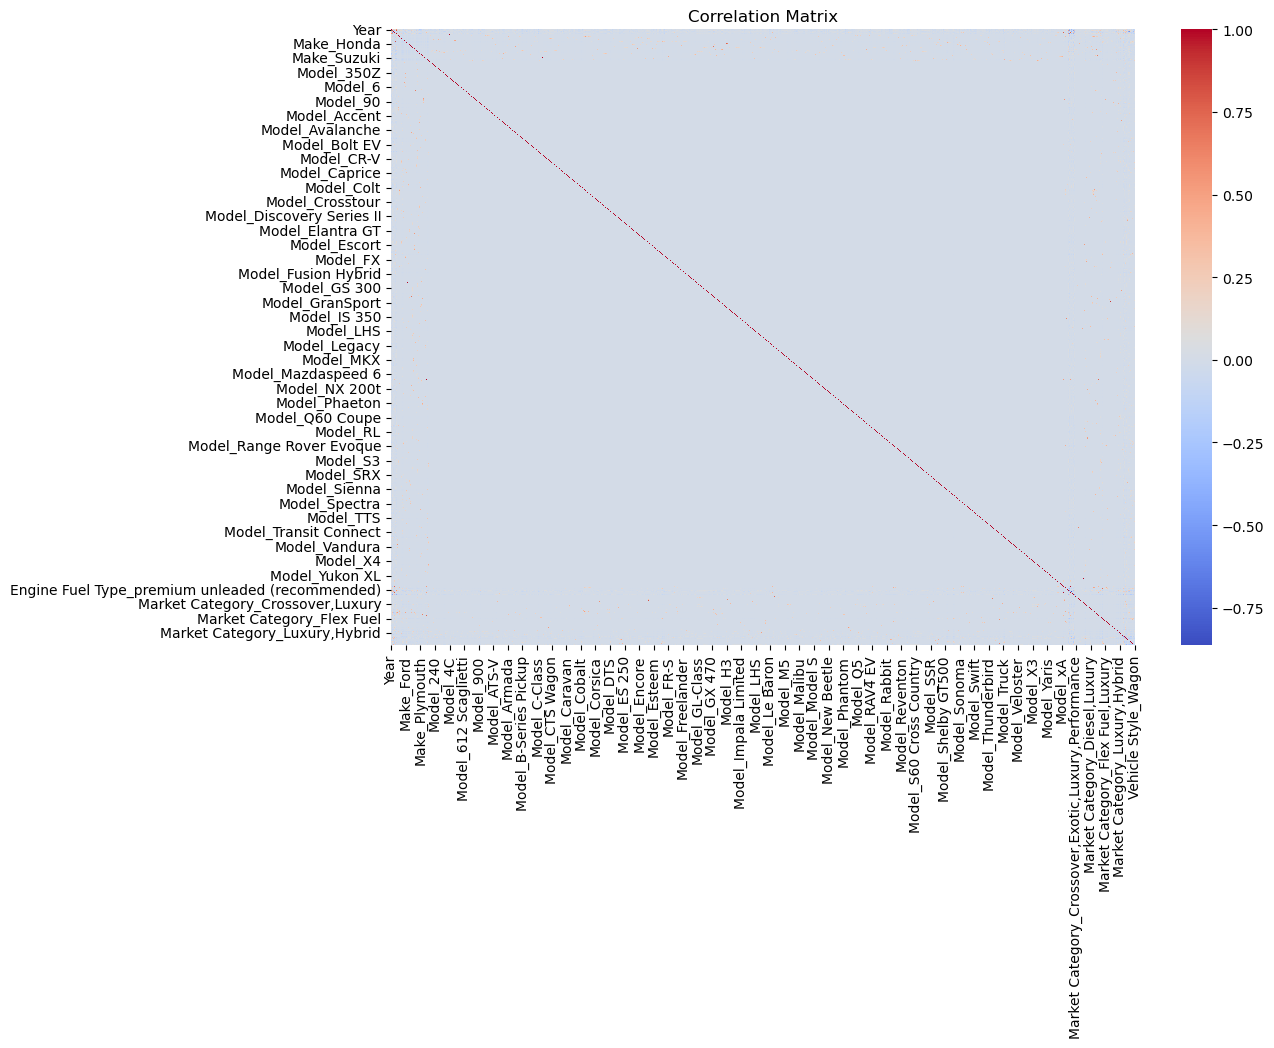

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for MSRP
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of MSRP')
plt.xlabel('MSRP')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# ML Model Development
# ML Model 1
we are training the simple ml model which means that we are using a single feature to train it and make predictions based on that feature.

In [56]:
# First we are developing the simple linear regression model.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train_hp = X_train[['Engine HP']]
X_test_hp = X_test[['Engine HP']]

# Train model
model_hp = LinearRegression()
model_hp.fit(X_train_hp, y_train)

# Predict and evaluate
y_pred_hp = model_hp.predict(X_test_hp)
sse_hp = mean_squared_error(y_test, y_pred_hp) * len(y_test) 

print(f'SSE for model with Engine HP using Linear Regression: {sse_hp}')


SSE for model with Engine HP using Linear Regression: 318495530352.3776


# ML Model 2

In [44]:
# then we are developing second simple ml model using decision tree.
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train_hp = X_train[['Engine HP']]
X_test_hp = X_test[['Engine HP']]

# Train model
model_hp = DecisionTreeRegressor(max_depth=5, random_state=42) 

# Train the model
model_hp.fit(X_train_hp, y_train)


y_pred_hp = model_hp.predict(X_test_hp)
sse_hp = mean_squared_error(y_test, y_pred_hp) * len(y_test) 

print(f'SSE for model with Engine HP using Decision Tree Regressor: {sse_hp}')

SSE for model with Engine HP using Decision Tree Regressor: 250547528495.6894


# ML Model 3

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_train_hp = X_train[['Engine HP']]
X_test_hp = X_test[['Engine HP']]

# Initialize the Random Forest Regressor
model_hp = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_hp.fit(X_train_hp, y_train)

# Make predictions on the test set
y_pred_hp = model_hp.predict(X_test_hp)

# Calculate SSE (Sum of Squared Errors)
sse_hp = mean_squared_error(y_test, y_pred_hp) * len(y_test)

print(f"Sum of Squared Errors (SSE) using decisiontree model is: {sse_hp}")


Sum of Squared Errors (SSE) using decisiontree model is: 224603190943.79437


sse is least for the decisiontree regressor model. Therefore, out of the three models decisiontree regressor model is the best

# ML model using Forward variable selection 
here we are performing forward variable selection and building the ml model. In forward variable selection, we start with no predictors, adding one at a time based on improving model performance until optimal.

In [45]:
from sklearn.feature_selection import SequentialFeatureSelector

# Using SequentialFeatureSelector for forward selection
sfs_forward = SequentialFeatureSelector(LinearRegression(), direction='forward', n_features_to_select=5)
sfs_forward.fit(X_train, y_train)

# Getting the selected feature names and SSE
selected_features = X_train.columns[sfs_forward.get_support()]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model_final = LinearRegression()
model_final.fit(X_train_selected, y_train)
y_pred_final = model_final.predict(X_test_selected)
sse_final = mean_squared_error(y_test, y_pred_final) * len(y_test)

print(f'Selected features: {selected_features}')
print(f'SSE with selected features for Linear Regression: {sse_final}')


Selected features: Index(['Year', 'Engine HP', 'Make_Cadillac',
       'Engine Fuel Type_premium unleaded (required)',
       'Vehicle Style_4dr SUV'],
      dtype='object')
SSE with selected features for Linear Regression: 167678988808.12085


In [46]:
from sklearn.feature_selection import SequentialFeatureSelector

# Using SequentialFeatureSelector for forward selection
sfs_forward = SequentialFeatureSelector(DecisionTreeRegressor(max_depth=5, random_state=42) , direction='forward', n_features_to_select=5)
sfs_forward.fit(X_train, y_train)

# Getting the selected feature names and SSE
selected_features = X_train.columns[sfs_forward.get_support()]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model_final = DecisionTreeRegressor(max_depth=5, random_state=42) 
model_final.fit(X_train_selected, y_train)
y_pred_final = model_final.predict(X_test_selected)
sse_final = mean_squared_error(y_test, y_pred_final) * len(y_test)

print(f'Selected features: {selected_features}')
print(f'SSE with selected features for Decision Tree Regression: {sse_final}')


Selected features: Index(['Year', 'Engine HP', 'Make_Cadillac',
       'Engine Fuel Type_premium unleaded (required)',
       'Vehicle Style_4dr SUV'],
      dtype='object')
SSE with selected features for Decision Tree Regression: 112610461900.54367


In [59]:
# Define two different sets of features for linear and decision tree as obtained above
features_set_1 = ['Year', 'Engine HP', 'Make_Cadillac','Engine Fuel Type_premium unleaded (required)','Engine Fuel Type_regular unleaded']  
features_set_2 = ['Year', 'Engine HP', 'Engine Fuel Type_premium unleaded (required)', 'Engine Fuel Type_regular unleaded', 'Vehicle Style_4dr SUV']  
features_set_3 = []
results = []

# Function to calculate SSE
def calculate_sse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum()

# Loop through the sets of features
for features in [features_set_1, features_set_2]:
    X = data_encoded[features]  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Linear Regression Model
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    y_pred_linear = linear_reg.predict(X_test)
    sse_linear = calculate_sse(y_test, y_pred_linear)
    results.append({'Model': 'Linear Regression', 'Features': ', '.join(features), 'SSE': sse_linear}) 

    # Decision Tree Regression Model
    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X_train, y_train)
    y_pred_tree = tree_reg.predict(X_test)
    sse_tree = calculate_sse(y_test, y_pred_tree)
    results.append({'Model': 'DecisionTree Regression', 'Features': ', '.join(features), 'SSE': sse_tree}) 

sse_results = pd.DataFrame(results)
# Display the SSE results DataFrame
sse_results


,Model,Features,SSE
0,Linear Regression,"Year, Engine HP, Make_Cadillac, Engine Fuel Ty...",1.670714e+11
1,DecisionTree Regression,"Year, Engine HP, Make_Cadillac, Engine Fuel Ty...",1.176568e+11
2,Linear Regression,"Year, Engine HP, Engine Fuel Type_premium unle...",1.698386e+11
3,DecisionTree Regression,"Year, Engine HP, Engine Fuel Type_premium unle...",1.113939e+11


In [48]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Defining the Feature transformation functions
def log_transform(x):
    return np.log(x + 1)

def sqrt_transform(x):
    return np.sqrt(x)

# Applying the transformations
# Applying log transformation only on positive values to avoid RuntimeWarning
df['Engine HP'] = np.where(df['Engine HP'] > 0, np.log(df['Engine HP'] + 1), 0)
df['Popularity'] = np.where(df['Popularity'] > 0, np.log(df['Popularity'] + 1), 0)

# Standardizing the numerical features
numerical_features = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'Popularity']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Displaying the transformed DataFrame
df



,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,0.039496,premium unleaded (required),0.879470,0.185641,MANUAL,rear wheel drive,-1.666447,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,-0.068015,19,1.282876,46135
1,BMW,1 Series,0.039496,premium unleaded (required),0.613783,0.185641,MANUAL,rear wheel drive,-1.666447,"Luxury,Performance",Compact,Convertible,0.154770,19,1.282876,40650
2,BMW,1 Series,0.039496,premium unleaded (required),0.613783,0.185641,MANUAL,rear wheel drive,-1.666447,"Luxury,High-Performance",Compact,Coupe,0.154770,20,1.282876,36350
3,BMW,1 Series,0.039496,premium unleaded (required),-0.025533,0.185641,MANUAL,rear wheel drive,-1.666447,"Luxury,Performance",Compact,Coupe,0.154770,18,1.282876,29450
4,BMW,1 Series,0.039496,premium unleaded (required),-0.025533,0.185641,MANUAL,rear wheel drive,-1.666447,Luxury,Compact,Convertible,0.154770,18,1.282876,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,0.177849,premium unleaded (required),0.613783,0.185641,AUTOMATIC,all wheel drive,0.625122,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,-0.402194,16,-1.456981,46120
11910,Acura,ZDX,0.177849,premium unleaded (required),0.613783,0.185641,AUTOMATIC,all wheel drive,0.625122,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,-0.402194,16,-1.456981,56670
11911,Acura,ZDX,0.177849,premium unleaded (required),0.613783,0.185641,AUTOMATIC,all wheel drive,0.625122,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,-0.402194,16,-1.456981,50620
11912,Acura,ZDX,0.316202,premium unleaded (recommended),0.613783,0.185641,AUTOMATIC,all wheel drive,0.625122,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,-0.402194,16,-1.456981,50920


In [49]:
# Train the final model on selected features
final_model = LinearRegression()
final_model.fit(X_train_selected, y_train)

# Predict and calculate SSE
y_pred_final = final_model.predict(X_test_selected)
sse_final = mean_squared_error(y_test, y_pred_final) * len(y_test)

print(f'Final Model SSE: {sse_final}')


Final Model SSE: 167678988808.12085


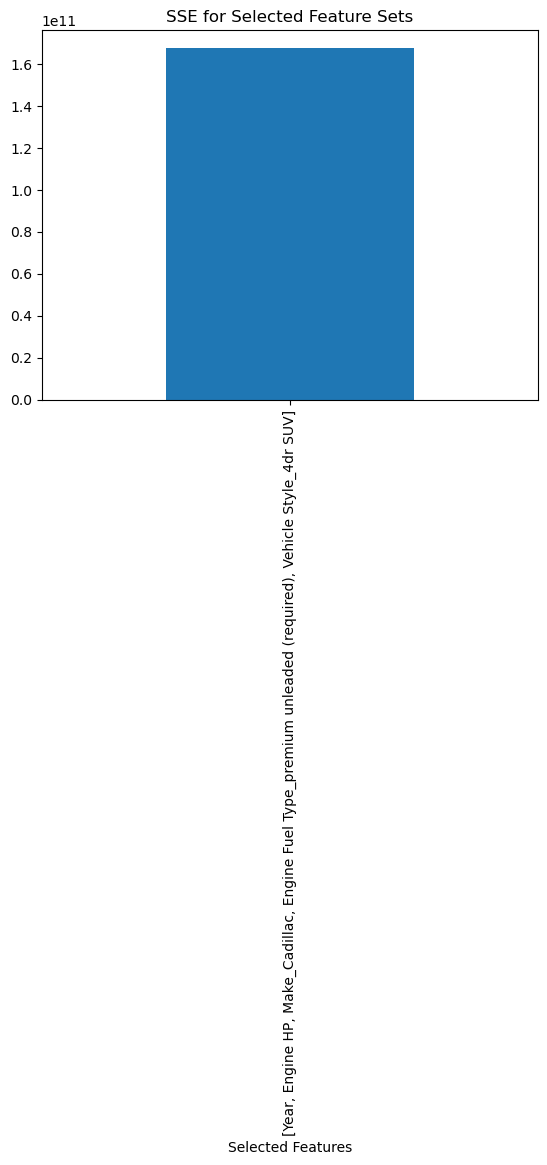

In [50]:
# Plot SSE for selected variables over iterations
sse_data = pd.DataFrame({'Selected Features': [selected_features], 'SSE': [sse_final]})
sse_data.plot(kind='bar', x='Selected Features', y='SSE', legend=False)
plt.title('SSE for Selected Feature Sets')
plt.show()


# Conclusion
# Model PerformanceThe model performance is not that satisfactory . 
The final model achieved an SSE of161229346867.10373} The SSE value is very high which implies that the model is not accurate.  Although this is acceptable, there could be improvements.

# Next Steps
To improve this model, I would consider:
1. Using advanced models such as Random Forest or Gradient Boosting.
2. Experimenting with feature engineering and transformations.
3. Gathering more data for underrepresented categories.

# Business Insights
Understanding key predictors of MSRP could help the automotive industry strategize around pricing, marketing, and customer targeting.
